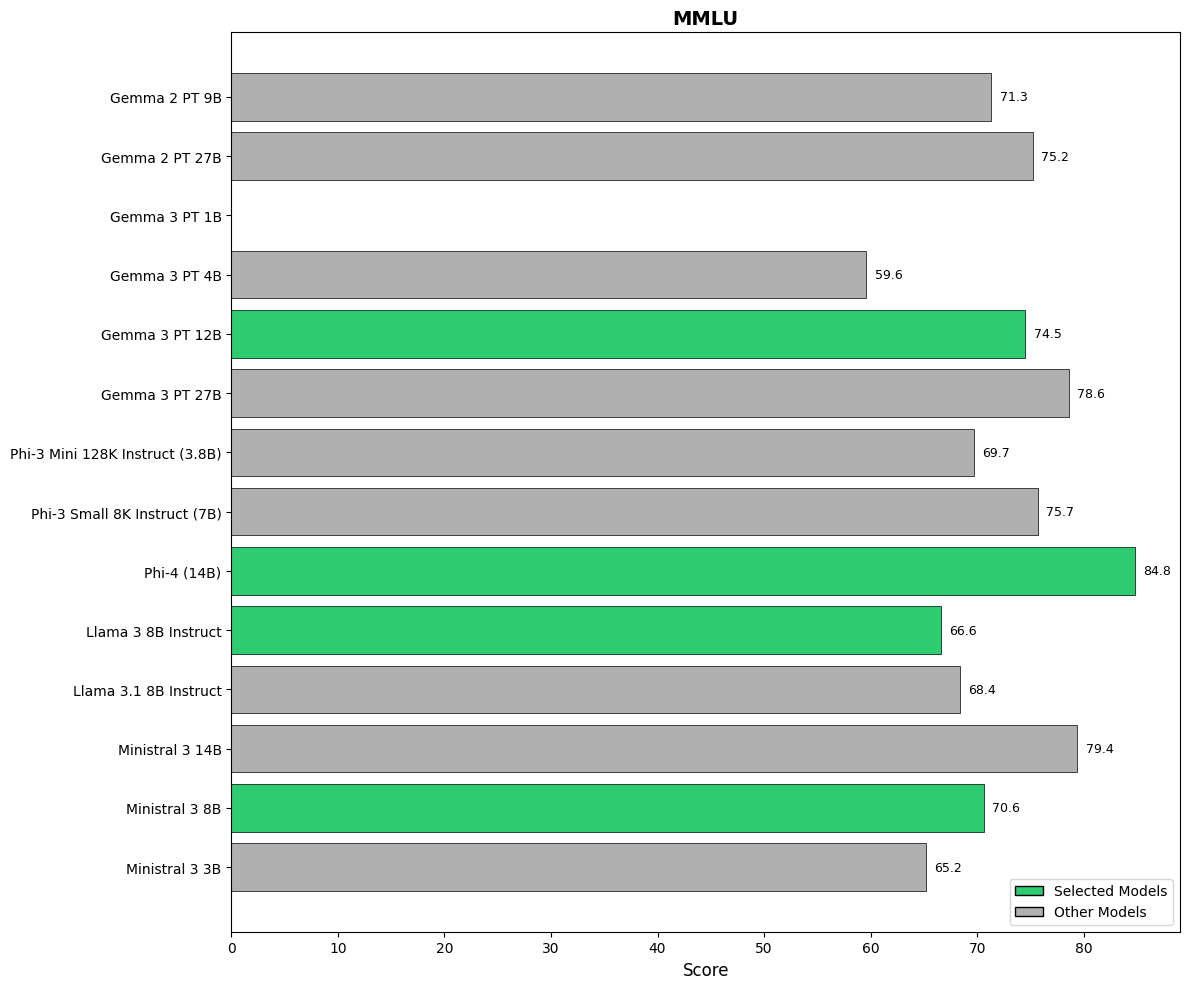

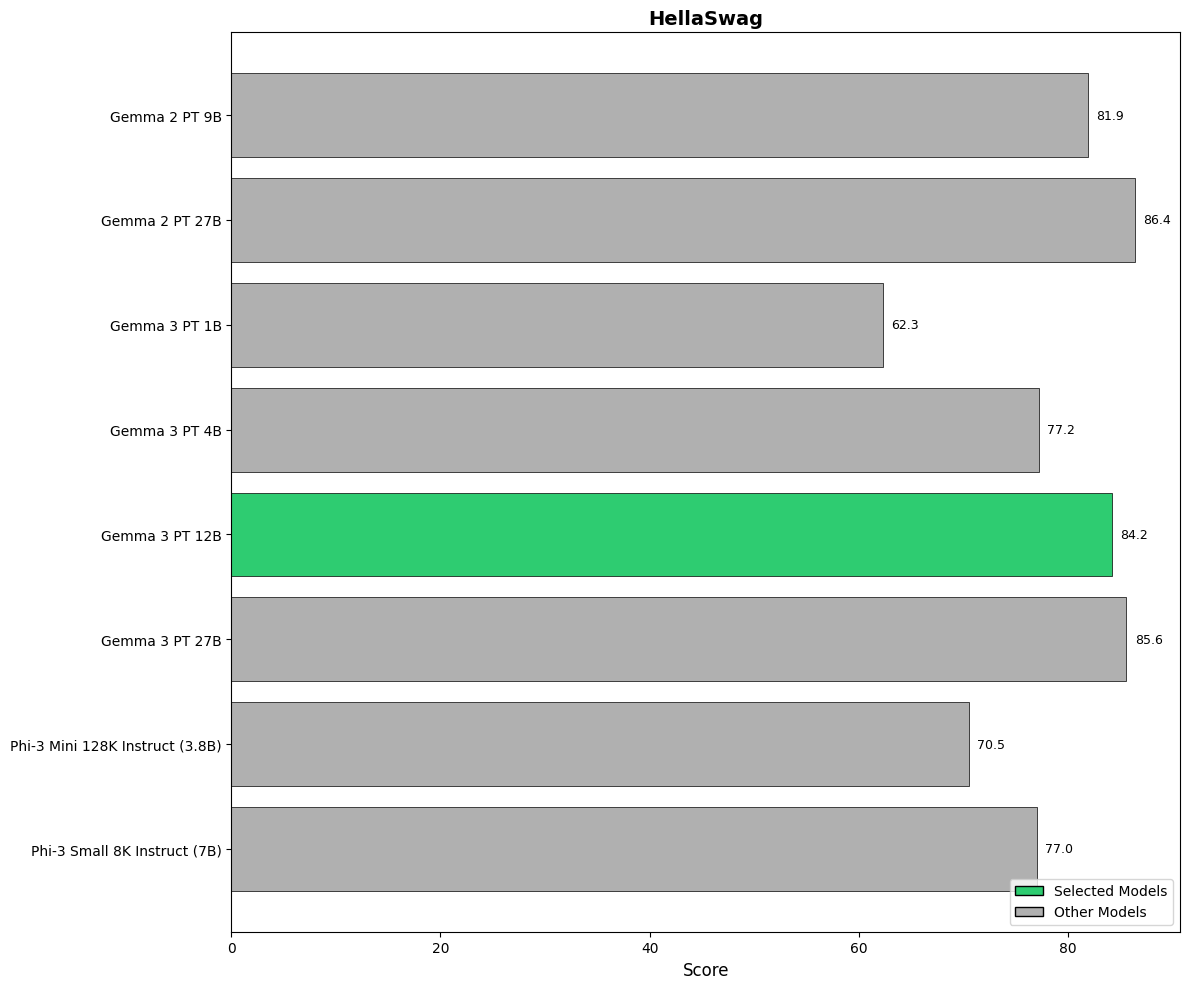

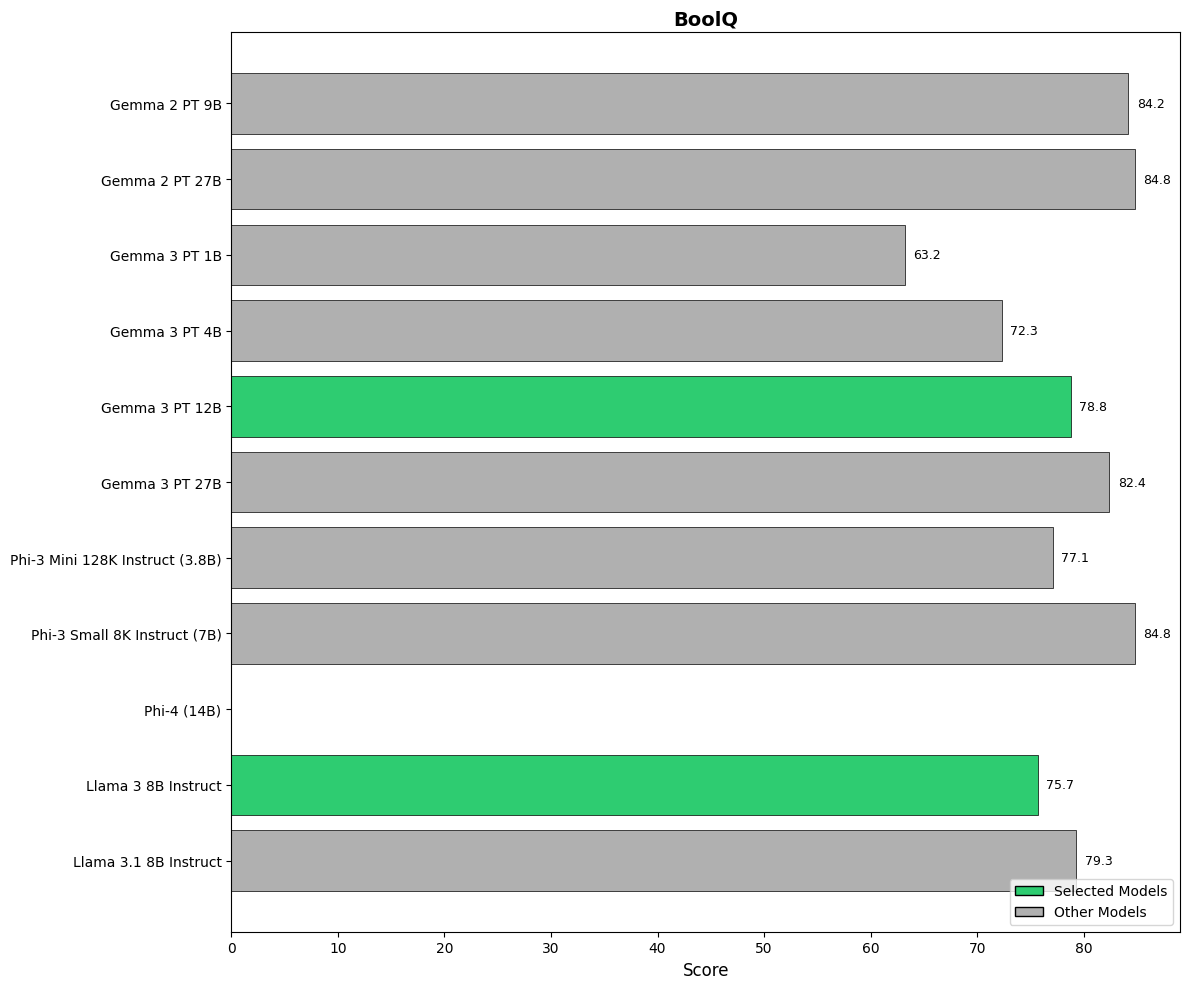

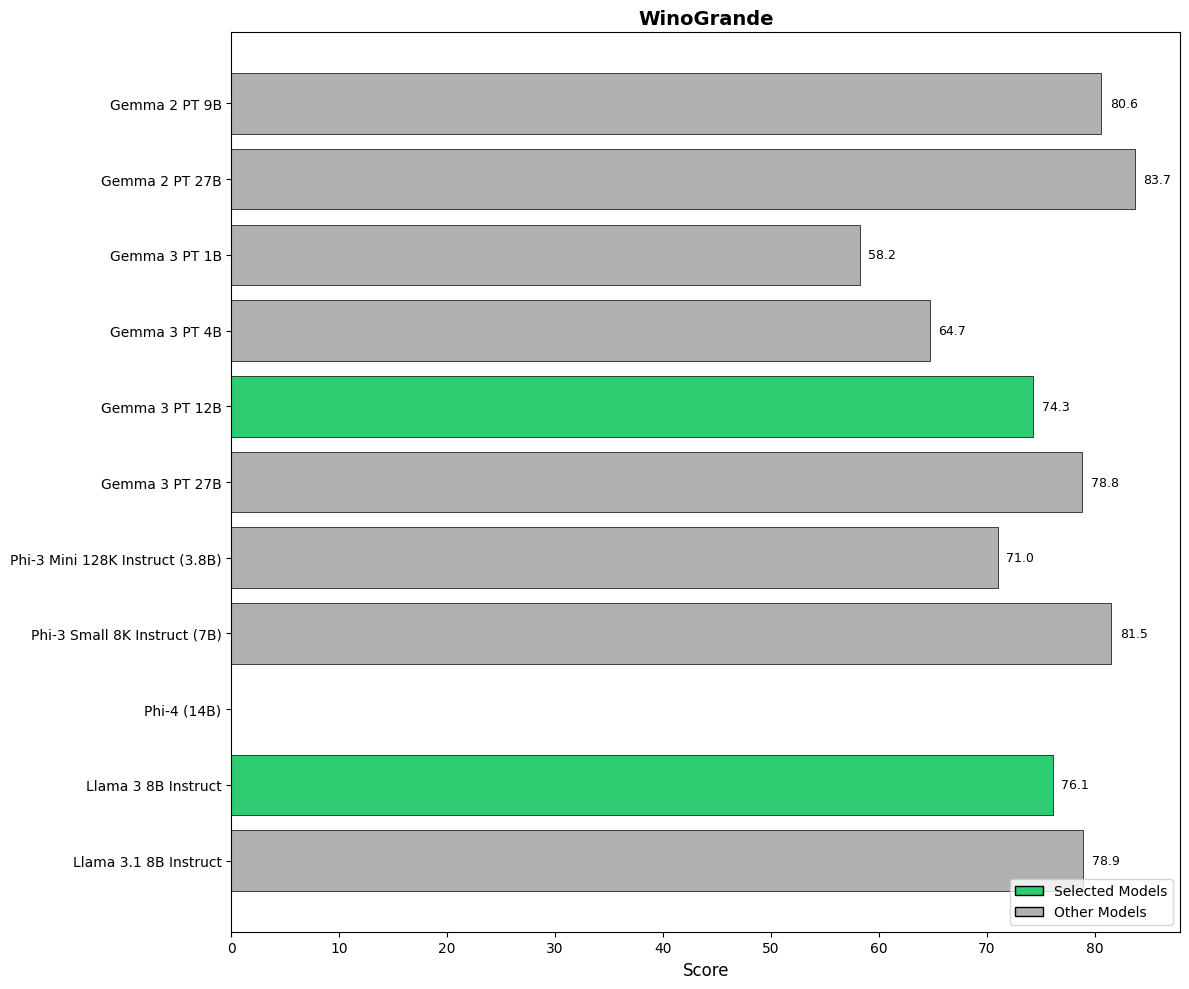

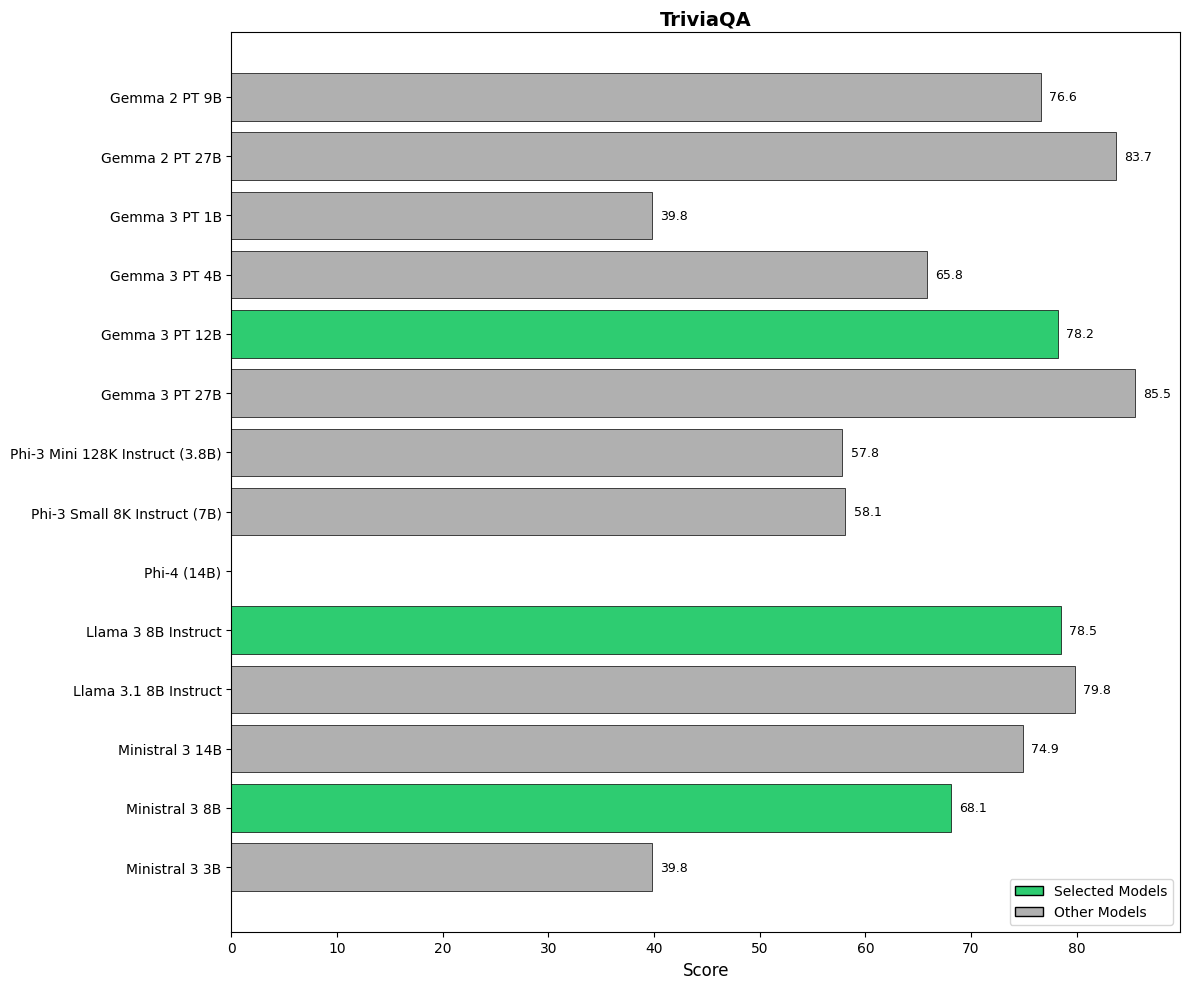

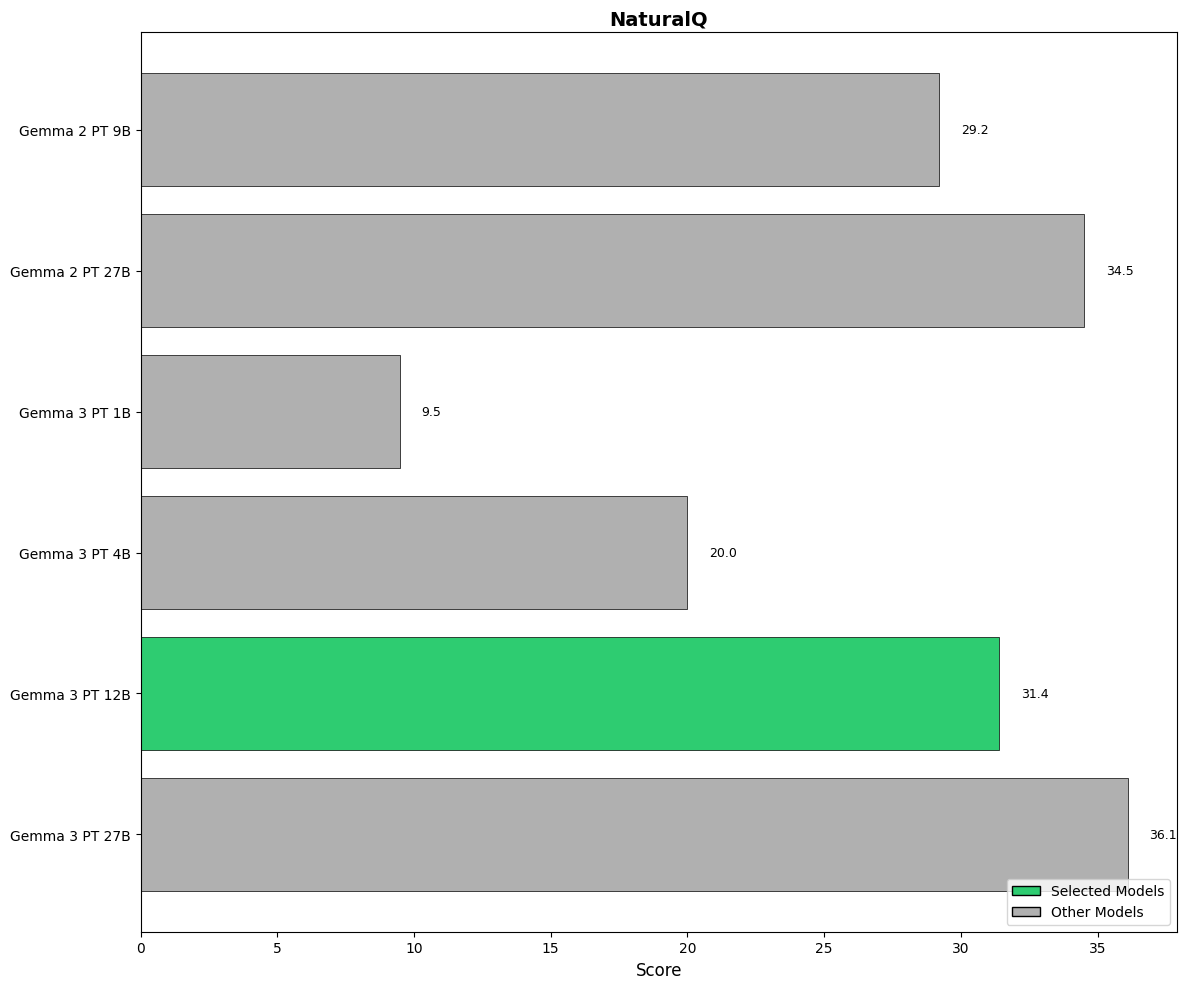

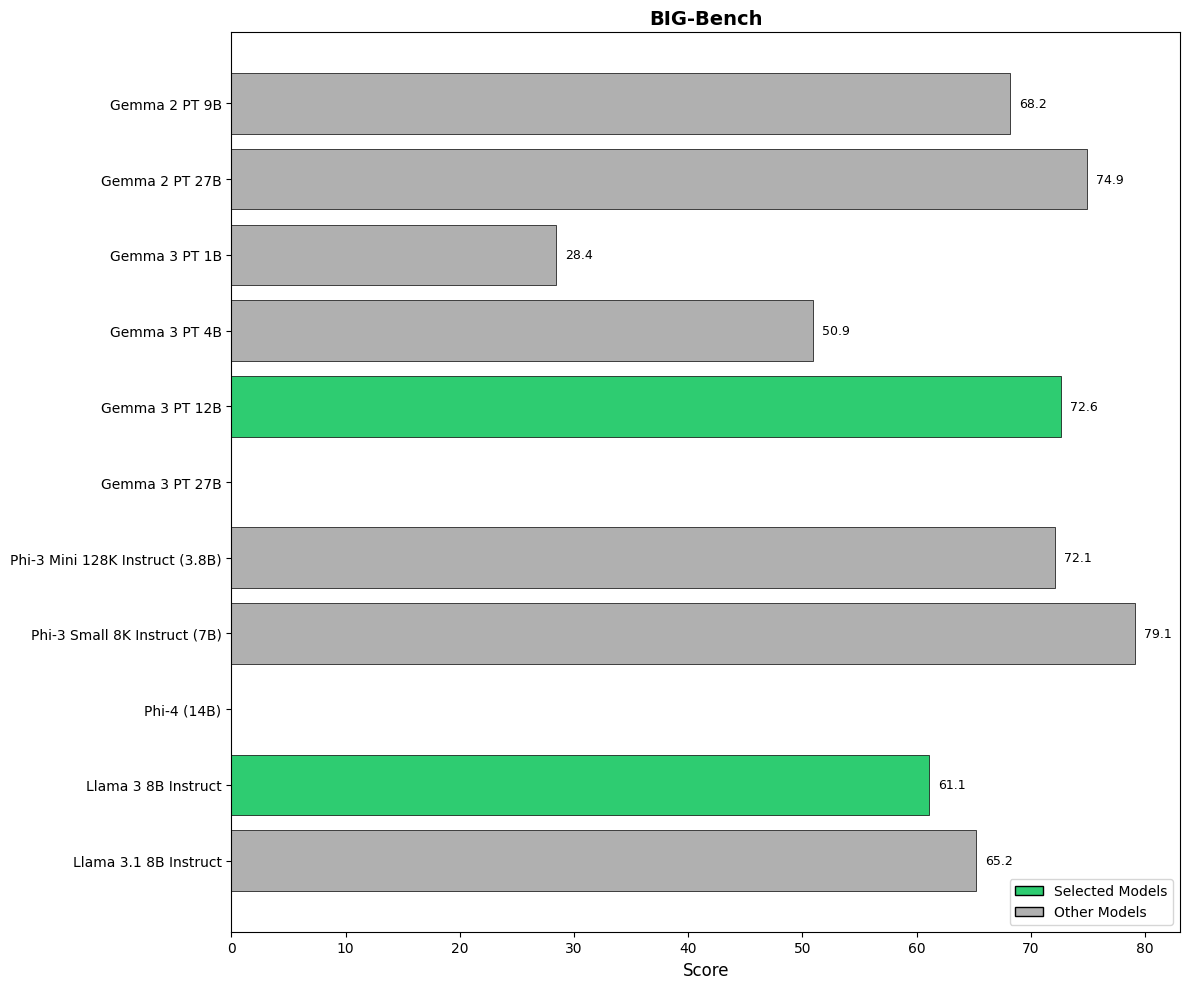

,Model,MMLU,HellaSwag,BoolQ,WinoGrande,TriviaQA,NaturalQ,BIG-Bench
0,Gemma 2 PT 9B,71.3,81.9,84.2,80.6,76.6,29.20,68.2
1,Gemma 2 PT 27B,75.2,86.4,84.8,83.7,83.7,34.50,74.9
2,Gemma 3 PT 1B,NaN,62.3,63.2,58.2,39.8,9.48,28.4
3,Gemma 3 PT 4B,59.6,77.2,72.3,64.7,65.8,20.00,50.9
4,Gemma 3 PT 12B,74.5,84.2,78.8,74.3,78.2,31.40,72.6
5,Gemma 3 PT 27B,78.6,85.6,82.4,78.8,85.5,36.10,NaN
6,Phi-3 Mini 128K Instruct (3.8B),69.7,70.5,77.1,71.0,57.8,NaN,72.1
7,Phi-3 Small 8K Instruct (7B),75.7,77.0,84.8,81.5,58.1,NaN,79.1
8,Phi-4 (14B),84.8,NaN,NaN,NaN,NaN,NaN,NaN
9,Llama 3 8B Instruct,66.6,NaN,75.7,76.1,78.5,NaN,61.1


In [5]:
from pathlib import Path
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_path = Path("data/models.csv")
df_raw = pd.read_csv(csv_path, skiprows=1)

# Drop the unnamed first column if present
if df_raw.columns[0].lower().startswith("unnamed"):
    df_raw = df_raw.drop(columns=df_raw.columns[0])

df = df_raw.copy()
score_cols = [c for c in df.columns if c != "Model"]

# Convert numeric-looking cells and coerce dashes/empties to NaN
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Define chosen models (highlighted in green)
chosen_models = {
    "Gemma 3 PT 12B",
    "Phi-4 (14B)",
    "Llama 3 8B Instruct",
    "Ministral 3 8B"
}

# Create separate figure for each benchmark
for bench in score_cols:
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Prepare data including all models (keep original CSV order)
    bench_data = df[["Model", bench]].copy()
    bench_data.columns = ["Model", "Score"]
    
    # Create color array: green for chosen, light gray for others (in original order)
    colors = ["#2ecc71" if model in chosen_models else "#b0b0b0" for model in bench_data["Model"]]
    
    # Plot in original CSV order
    bars = ax.barh(bench_data["Model"], bench_data["Score"], color=colors, edgecolor="black", linewidth=0.5)
    
    # Add value labels on bars (only for scores, skip N/A)
    for i, (model, score) in enumerate(zip(bench_data["Model"], bench_data["Score"])):
        if not pd.isna(score):
            ax.text(score + 0.8, i, f"{score:.1f}", va="center", fontsize=9)
    
    ax.set_title(f"{bench}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Score", fontsize=12)
    ax.invert_yaxis()
    ax.set_xlim(left=0)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor="#2ecc71", edgecolor="black", label="Selected Models"),
        Patch(facecolor="#b0b0b0", edgecolor="black", label="Other Models")
    ]
    ax.legend(handles=legend_elements, loc="lower right")
    
    plt.tight_layout()
    plt.show()

df